In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import datetime as dt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 22})
plt.style.use('seaborn-poster')
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# 1. Bar--Time series

In [12]:
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
df = pd.read_excel(url, 'Average Wage Quartile', header=2, parse_dates=True, index_col=0)
df = df[['1st','2nd','3rd','4th']]
df = df['1997-12':]
df.head(2)

,1st,2nd,3rd,4th
1997-12-01,6.3,4.7,4.1,4.1
1998-01-01,6.4,4.8,4.1,4.1


In [13]:
df[['1st', '2nd', '3rd', '4th']] = df[['1st', '2nd', '3rd', '4th']].astype(float)
df = df.resample('A').mean()

In [14]:
labels = [x.strftime('%Y-%m-%d') for x in df.index]

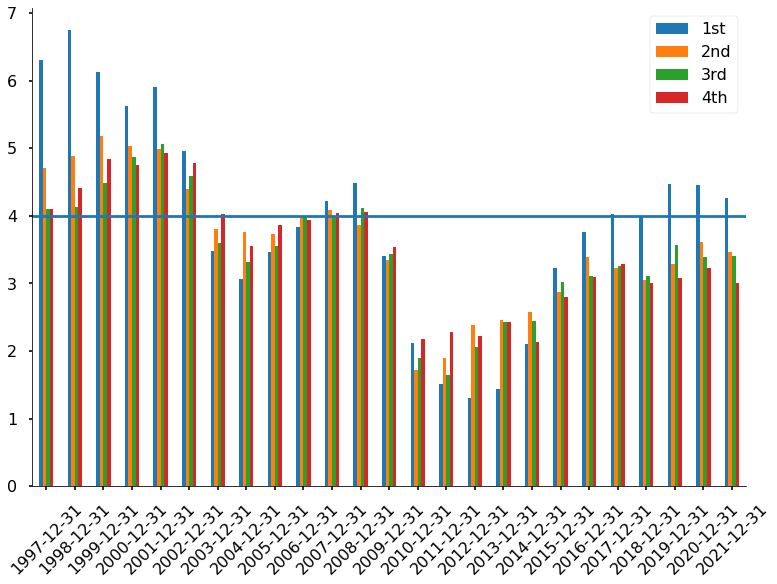

In [17]:
ax = df.plot.bar()
ax.axhline(4)
plt.xticks(rotation = 45)
ax.set_xticklabels(labels);

# 2. Bar--Horizontal

In [18]:
data_dict = {'Total': [9,16,76],
    '<20k':[8,17,75],
          '20-40k':[13,17,70],
          '40-75k':[5,14,81],
          '75-100k':[7,9,84],
          '>100k':[6,12,82]}

In [19]:
rent = pd.DataFrame.from_dict(data_dict)
rent.index = ['Missed payment','Missed but do not owe','Never missed']
rent

,Total,<20k,20-40k,40-75k,75-100k,>100k
Missed payment,9,8,13,5,7,6
Missed but do not owe,16,17,17,14,9,12
Never missed,76,75,70,81,84,82


Text(0.15, -0.05, 'SRC: Federal Reserve Bank of Philadelphia')

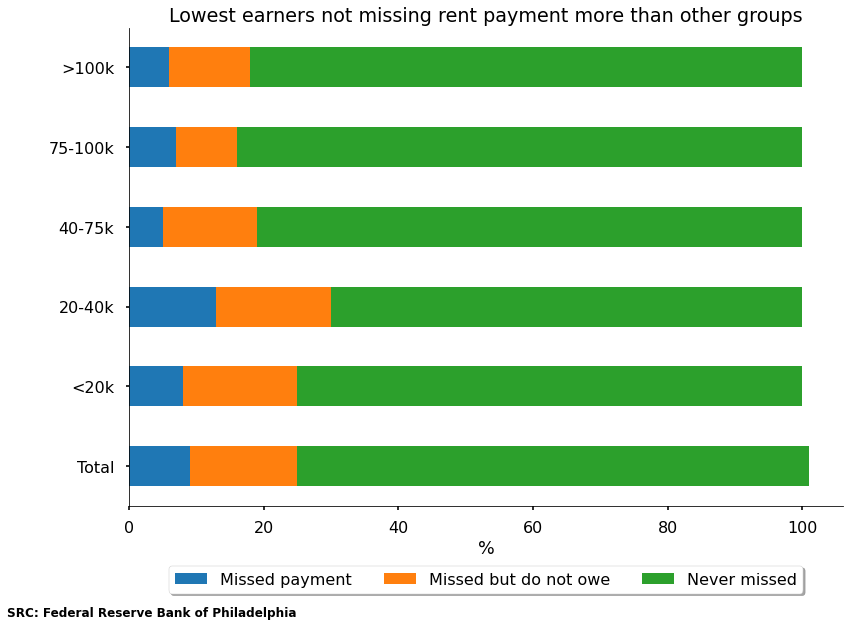

In [21]:
rent.T.plot.barh(stacked=True)


plt.legend(
    bbox_to_anchor=[0.5, -.2], loc='lower center', ncol=3, shadow=True)
plt.title('Lowest earners not missing rent payment more than other groups')
plt.xlabel('%')


# 3. Bar vertical

In [22]:
url = 'https://adpemploymentreport.com/2021/June/NER/docs/ADP_NER_History_2021_06.xlsx'
adp_industry = pd.read_excel(url, header=2, usecols= [0, *range(11, 26)], skipfooter=6 )
adp_industry.Month = [pd.to_datetime(str(x).replace('M','-')+'-01') for x in adp_industry.Month]
adp_industry.set_index('Month', inplace=True)
adp_industry.rename(columns={'Prof.l/business services':'Biz services','Natural resources & mining':'Mining', 
                             'Professional services':'Prof. services','Management of companies':'Management', 
                             'Administrative & support services':'Administrative','Trade/transp./utilities':'Transportation',
                             'Education & health services':'Education & health'
                            },inplace=True)
adp_industry.tail(3)

,Construction,Mining,Manufacturing,Biz services,Prof. services,Management,Administrative,Education & health,Healthcare,Education,Leisure & hospitality,Transportation,Information,Financial activities,Other services
Month,,,,,,,,,,,,,,,
2021-04-01,7412.032054,667.684099,12284.376018,20414.735671,9414.771404,2338.701944,8661.262323,23633.660518,20058.351443,3575.309075,13288.188314,26636.677974,2532.322692,8682.589749,5448.957792
2021-05-01,7461.790553,676.442801,12328.562902,20471.988919,9439.336371,2339.963746,8692.688803,23763.293403,20164.382096,3598.911307,13702.540123,26741.616279,2534.766230,8699.007795,5507.334029
2021-06-01,7508.797699,678.367453,12347.201706,20525.397806,9461.254698,2339.262935,8724.880174,23886.454267,20257.847629,3628.606638,14034.685857,26804.032550,2530.327650,8708.510931,5555.104674


In [23]:
first = adp_industry['2020-02-01':].iloc[0]

last = adp_industry['2020-02-01':].iloc[-1]

change_jobs = (last-first)/1000
change_jobs.drop(['Management','Mining','Prof. services',
                  'Construction','Financial activities',
                 'Education'],axis=0, inplace=True)
change_jobs

Manufacturing           -0.437747
Biz services            -1.022487
Administrative          -0.750836
Education & health      -0.638731
Healthcare              -0.467901
Leisure & hospitality   -2.773379
Transportation          -1.062267
Information             -0.308633
Other services          -0.361033
dtype: float64

Text(0, 0.5, 'Change in jobs since February 2020, Millions')

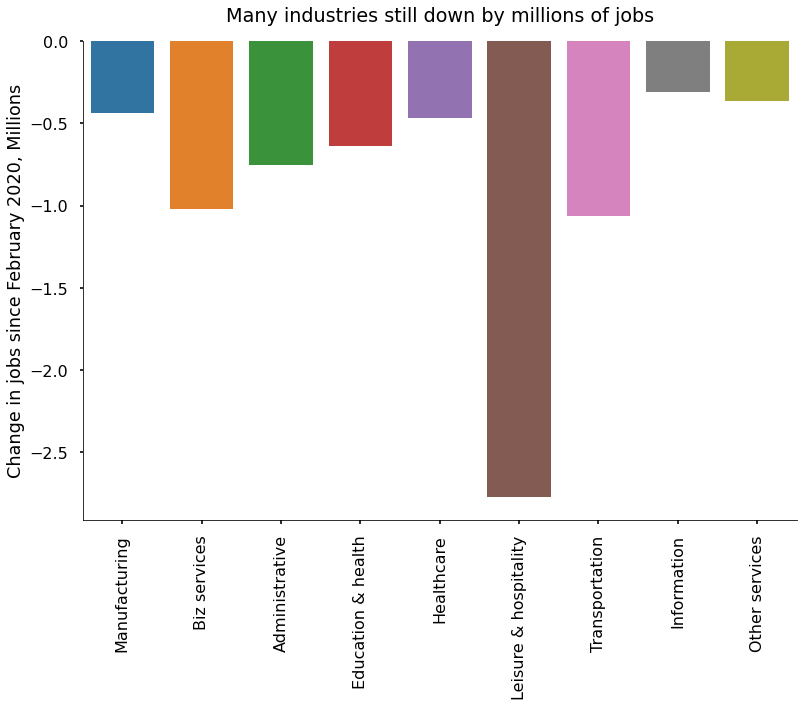

In [24]:
sns.barplot(x = change_jobs.index, y = change_jobs.values)
plt.xticks(rotation = 90) 
plt.title('Many industries still down by millions of jobs',pad=20)
plt.ylabel('Change in jobs since February 2020, Millions')
